Question: Exploratory Data Analysis on Airbnb Dataset

Marking 100 م

Objective Conduct an exploratory data analysis (EDA) on a dataset of Airbnb listings to gain insights into the factors affecting rental prices and customer satisfaction

Dataset: The dataset contains information on Airbnb listings in New York City. You can download the dataset from the following link

https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

Tasks

Import and clean the dataset Handle missing values, remove duplicates, and perform necessary data transformations. Conduct descriptive statistics analysis: Calculate

mean, median, mode, variance, and standard deviation for numerical variables Visualize the data. Create appropriate visualizations (eg, histograms, boxplots, bar charts) to analyze the distribution of numerical variables and the relationships between categorical and numerical variables.

Analyze geographical data: Create a heatmap to visualize the density of listings across New York City neighborhoods. Identify areas with the highest concentration of Airbnb listings

Investigate the relationship between room type, neighborhood group, and price. Perform appropriate statistical tests (eg, I-test, ANOVA) to determine if there are significant differences in rental prices based on room type and neighborhood group.

Analyze the relationship between customer satisfaction (as measured by the number of reviews and reviews_per_month) and factors such as price, room type and

neighborhood group Based on your findings, provide recommendations to Airbnb hosts on how to improve customer satisfaction and increase rental prices. Consider potential strategies such as offering different room types, targeting specific neighborhoods, or adjusting pricing based on demand and competition.

Submission

Submit a report detailing your analysis, including data preparation, descriptive statistics, visualizations, statistical tests, and recommendations. The report should be well organized clear and concise, with appropriate use of tables, graphs, and figures to support your findings.

1. **`id`:**
   - **Description:** A unique identifier for each listing.
   - **Usage:** Essential for uniquely identifying each listing in the dataset. It serves as a primary key.

2. **`name`:**
   - **Description:** The name or title of the Airbnb listing.
   - **Usage:** Provides a brief description of the listing. This information is valuable for users to understand the nature of the listing.

3. **`host_id`:**
   - **Description:** A unique identifier for each host.
   - **Usage:** Allows tracking listings to specific hosts. Helpful for understanding the distribution of hosts and analyzing host-related patterns.

4. **`host_name`:**
   - **Description:** The name of the host.
   - **Usage:** Provides information about the host associated with each listing. Can be useful for analyzing host-specific characteristics and preferences.

5. **`neighbourhood_group`:**
   - **Description:** The borough in which the listing is located.
   - **Usage:** Essential for analyzing the geographical distribution of listings. Helps users filter listings based on borough preferences.

6. **`neighbourhood`:**
   - **Description:** The specific neighborhood in which the listing is located.
   - **Usage:** Important for granular location analysis. Users may have preferences for specific neighborhoods.

7. **`latitude` and `longitude`:**
   - **Description:** Coordinates representing the geographical location of the listing.
   - **Usage:** Critical for mapping and spatial analysis. Enables the creation of visualizations like heatmaps to understand the distribution of listings across NYC.

8. **`room_type`:**
   - **Description:** The type of room offered in the listing (e.g., Entire home/apt, Private room, Shared room).
   - **Usage:** Important for understanding the variety of accommodations available. Useful for users to filter listings based on their preferred type of stay.

9. **`price`:**
   - **Description:** The nightly price for renting the listing.
   - **Usage:** Essential for analyzing pricing patterns. Helps users compare prices across listings and make informed decisions.

10. **`minimum_nights`:**
    - **Description:** The minimum number of nights required to book the listing.
    - **Usage:** Provides information about booking policies. Users can filter listings based on their desired length of stay.

11. **`number_of_reviews`:**
    - **Description:** The total number of reviews received by the listing.
    - **Usage:** Indicates the popularity and engagement level of a listing. Can influence user decisions based on the number and quality of reviews.

12. **`last_review`:**
    - **Description:** The date of the last review received by the listing.
    - **Usage:** Offers insights into the recency of reviews. Useful for understanding how recent and active a listing is.

13. **`reviews_per_month`:**
    - **Description:** The average number of reviews received per month.
    - **Usage:** Provides a measure of the listing's ongoing popularity. Helps users assess the consistency of positive reviews over time.

14. **`calculated_host_listings_count`:**
    - **Description:** The total number of listings managed by the host.
    - **Usage:** Offers insights into the host's level of activity. Useful for understanding the scale and experience of hosts.

15. **`availability_365`:**
    - **Description:** The number of days the listing is available for booking in a year.
    - **Usage:** Indicates the availability of the listing. Users may prefer listings with higher availability for increased flexibility.

Understanding and analyzing these attributes collectively contribute to a comprehensive analysis of the Airbnb dataset, enabling insights into pricing strategies, host behaviors, geographic patterns, and user preferences.

In [45]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [22]:
df = pd.read_csv('AB_NYC_2019.csv')

In [24]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [51]:
# Dimension of the Dataset:
df.shape

(48895, 16)

In [38]:
# Dataset Information: It indicates the total values of each attribute and dtype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [48]:
# Categorical Datatypes column:
cat_columns = df.select_dtypes(include = 'object').columns
print(cat_columns)

# Numerical Datatypes column:
num_columns = df.select_dtypes(exclude='object').columns
print(num_columns)

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')
Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


In [50]:
# Check for Duplicates:
duplicate_count = df.duplicated().sum()
print('Number of Duplicate value:',duplicate_count)
# This indicates that there is no duplicate values in the data set

Number of Duplicate value: 0


In [53]:
# Missing Values:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

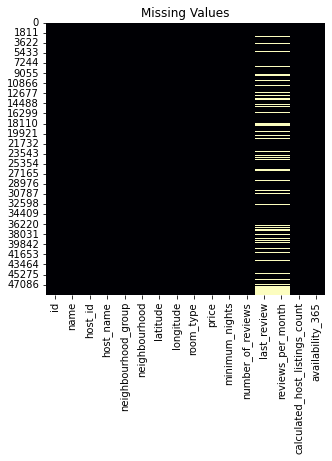

In [54]:
# Visulaizing the missing values:
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull(),cbar=False,cmap = 'magma')
plt.title('Missing Values')
plt.show()

In [55]:
# Finding the unique values
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [59]:
# Neighbourhood_groups
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [57]:
# How many neighbourhoods are there?
df['neighbourhood'].nunique()

221

In [60]:
# How many hosts are there?
df['host_id'].nunique()

37457

**Understanding of Datast:**
1. The dataset has 16 columns and 48895 rows
2. A significant number of values are missing in columns last_review,reviews_per_month
3. The rows are unique there is no any repeated record
4. There are 5 different neighbourgroups,221 neighbourhoods,36457 hosts,48,895 listings, and three types are rooms are available for rental

**Understanding Variables**

In [61]:
# Dataset columns:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [62]:
# Dataset Describe:
df.describe().round(2)

id       host_id  latitude  longitude     price  \
count     48895.00  4.889500e+04  48895.00   48895.00  48895.00   
mean   19017143.24  6.762001e+07     40.73     -73.95    152.72   
std    10983108.39  7.861097e+07      0.05       0.05    240.15   
min        2539.00  2.438000e+03     40.50     -74.24      0.00   
25%     9471945.00  7.822033e+06     40.69     -73.98     69.00   
50%    19677284.00  3.079382e+07     40.72     -73.96    106.00   
75%    29152178.50  1.074344e+08     40.76     -73.94    175.00   
max    36487245.00  2.743213e+08     40.91     -73.71  10000.00   

       minimum_nights  number_of_reviews  reviews_per_month  \
count        48895.00           48895.00           38843.00   
mean             7.03              23.27               1.37   
std             20.51              44.55               1.68   
min              1.00               0.00               0.01   
25%              1.00               1.00               0.19   
50%              3.00               5.00               0.72   
75%              5.00              24.00               2.02   
max           1250.00             629.00              58.50   

       calculated_host_listings_count  availability_365  
count                        48895.00          48895.00  
mean                             7.14            112.78  
std                             32.95            131.62  
min                              1.00              0.00  
25%                              1.00              0.00  
50%                              1.00             45.00  
75%                              2.00            227.00  
max                            327.00            365.00

**Variables Description**

ID: Unique ID of the Airbnb listing

Name Name of the Airbnb listing

Host ID: Unique Host ID

Host name: Name of the Host Neighbourhood group Location

Neighbourhood: Ares

Latitude: Latiude Range

Longitude: Longitude Range

Room type: Type of Room listed

Price Price of listing

Minimum nights: Minimum nights to be paid for Number of reviews Number of reviews

Last review: Last date of review

Reviews per month: Number of reviews per month

Calculated host listings count: Total count of listings of the host

Availability 365: Availability around the year

In [64]:
# Check Unique values for Each variable:
for i in df.columns.tolist():
    print('Number of unique values in',i,'is',df[i].nunique())

Number of unique values in id is 48895
Number of unique values in name is 47905
Number of unique values in host_id is 37457
Number of unique values in host_name is 11452
Number of unique values in neighbourhood_group is 5
Number of unique values in neighbourhood is 221
Number of unique values in latitude is 19048
Number of unique values in longitude is 14718
Number of unique values in room_type is 3
Number of unique values in price is 674
Number of unique values in minimum_nights is 109
Number of unique values in number_of_reviews is 394
Number of unique values in last_review is 1764
Number of unique values in reviews_per_month is 937
Number of unique values in calculated_host_listings_count is 47
Number of unique values in availability_365 is 366


**3.Data Wrangling**

In [65]:
# Before doing any data wrangling we create a copy of the dataset:
df2 = df.copy()

In [66]:
# Checking the number of rows with zero price in our dataset:
df2[df2['price']==0].shape

(11, 16)

Here we clearly see that these 11 entrries need to be drop in order to get meaningful analysis so we will be dropping these entries
where price equal to zero ('0')

In [67]:
# removing the rows having zero price values from our dataset:
df2 = df2[df2['price']!=0]

### Missing Values:
1. The columns with missing values are name,host_name,last_review and reviews_per_month with the last two missing 10,000 rows of data each
2. The number of reviews_per_month is  can be interesting to analyze, so the best way to deal with this column is to replace all the NaN values with the zeros,similarly host_name and names are not important for our analysis we can fill those with some substitutes in the both columns
3. The last review column will not be used for analysis and can be dropped.

In [69]:
# Since host_name and name has very less missing values when compared to the entire dataset  we can fill will these values
# with unknown and no_name respectively
df2['name'].fillna('Unknown',inplace=True)
df2['host_name'].fillna('anonymous',inplace=True)

In [72]:
# Check if the null values still exist:
df2[['host_name','name']].isnull().values.any() 

False

In [73]:
# or
df2[['host_name','name']].isnull().sum()

host_name    0
name         0
dtype: int64

In [75]:
# Filling the null values with reviews_per_month with 0:
df2['reviews_per_month']=df2['reviews_per_month'].fillna(0)

In [76]:
# Drop the last_review column:
df2.drop(['last_review'],axis=1,inplace=True)

In [81]:
# checking for change in shape:
df2.shape

(48884, 15)

Previous shape was(48895,16) and the shape of the new dataframe created after  cleaning is (48884,15) correctly removed 11 rows
where price value is zero

In [82]:
# Checking the changes:
df2.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Finding Insights

In [93]:

df_mean_median = df2[['neighbourhood_group', 'price', 'minimum_nights', 'number_of_reviews', 'availability_365']]

# Defining a function to get mean and median
def get_mean_median(data, neighbourhood_group):
    """
    This function gives mean and median of all features
    """
    # Try block to utilize error handling
    try:
        return pd.concat([df_mean_median[df_mean_median['neighbourhood_group'] == neighbourhood_group].describe().round(2).iloc[1],
                          df_mean_median[df_mean_median["neighbourhood_group"] == neighbourhood_group].describe().round(2).iloc[5]],
                         axis=1).rename(columns={'50%': 'Median'})
    except:
        print("Invalid neighbourhood Group")





In [96]:
# Using a for loop to print the mean,median for all unique values of neighbourhood_group
for i in df.neighbourhood_group.unique():
    print(i, get_mean_median(df_mean_median,i))
    print('\n')

Brooklyn                      mean  Median
price              124.44    90.0
minimum_nights       6.06     3.0
number_of_reviews   24.20     6.0
availability_365   100.22    28.0


Manhattan                      mean  Median
price              196.88   150.0
minimum_nights       8.58     3.0
number_of_reviews   20.99     4.0
availability_365   111.98    36.0


Queens                      mean  Median
price               99.52    75.0
minimum_nights       5.18     2.0
number_of_reviews   27.70     7.0
availability_365   144.45    98.0


Staten Island                      mean  Median
price              114.81    75.0
minimum_nights       4.83     2.0
number_of_reviews   30.94    12.0
availability_365   199.68   219.0


Bronx                      mean  Median
price               87.58    65.0
minimum_nights       4.56     2.0
number_of_reviews   25.98     9.0
availability_365   165.79   148.0




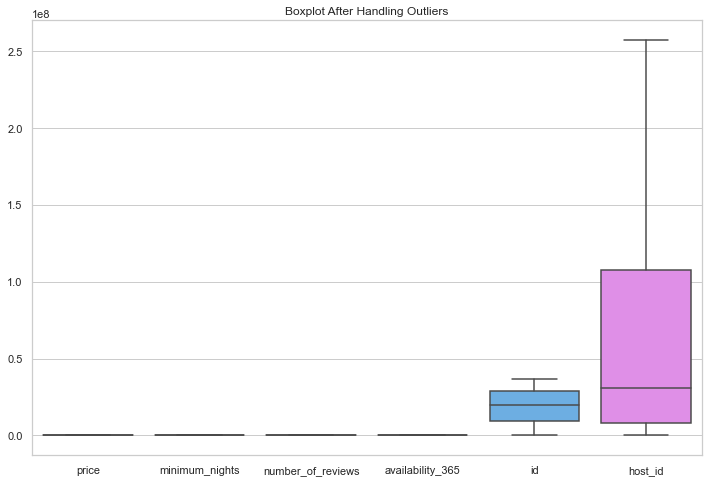

In [142]:
# Select columns with outliers
outlier_columns = ['price', 'minimum_nights','number_of_reviews','availability_365','id','host_id']

# Function to handle outliers using IQR approach
def handle_outliers_iqr(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with the upper/lower bounds
        data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
        data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Copy the DataFrame to avoid modifying the original
df2_cleaned = df2.copy()

# Apply the function to handle outliers
handle_outliers_iqr(df2_cleaned, outlier_columns)

# Check the boxplot after handling outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df2_cleaned[outlier_columns])
plt.title('Boxplot After Handling Outliers')
plt.show()


In [143]:
df2_cleaned

id                                               name  \
0          2539.0                 Clean & quiet apt home by the park   
1          2595.0                              Skylit Midtown Castle   
2          3647.0                THE VILLAGE OF HARLEM....NEW YORK !   
3          3831.0                    Cozy Entire Floor of Brownstone   
4          5022.0   Entire Apt: Spacious Studio/Loft by central park   
...           ...                                                ...   
48890  36484665.0    Charming one bedroom - newly renovated rowhouse   
48891  36485057.0      Affordable room in Bushwick/East Williamsburg   
48892  36485431.0            Sunny Studio at Historical Neighborhood   
48893  36485609.0               43rd St. Time Square-cozy single bed   
48894  36487245.0  Trendy duplex in the very heart of Hell's Kitchen   

          host_id      host_name neighbourhood_group       neighbourhood  \
0          2787.0           John            Brooklyn          Kensington   
1          2845.0       Jennifer           Manhattan             Midtown   
2          4632.0      Elisabeth           Manhattan              Harlem   
3          4869.0    LisaRoxanne            Brooklyn        Clinton Hill   
4          7192.0          Laura           Manhattan         East Harlem   
...           ...            ...                 ...                 ...   
48890   8232441.0        Sabrina            Brooklyn  Bedford-Stuyvesant   
48891   6570630.0        Marisol            Brooklyn            Bushwick   
48892  23492952.0  Ilgar & Aysel           Manhattan              Harlem   
48893  30985759.0            Taz           Manhattan      Hell's Kitchen   
48894  68119814.0     Christophe           Manhattan      Hell's Kitchen   

       latitude  longitude        room_type  price  minimum_nights  \
0      40.64749  -73.97237     Private room  149.0             1.0   
1      40.75362  -73.98377  Entire home/apt  225.0             1.0   
2      40.80902  -73.94190     Private room  150.0             3.0   
3      40.68514  -73.95976  Entire home/apt   89.0             1.0   
4      40.79851  -73.94399  Entire home/apt   80.0            10.0   
...         ...        ...              ...    ...             ...   
48890  40.67853  -73.94995     Private room   70.0             2.0   
48891  40.70184  -73.93317     Private room   40.0             4.0   
48892  40.81475  -73.94867  Entire home/apt  115.0            10.0   
48893  40.75751  -73.99112      Shared room   55.0             1.0   
48894  40.76404  -73.98933     Private room   90.0             7.0   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                    9.0               0.21                               6   
1                   45.0               0.38                               2   
2                    0.0               0.00                               1   
3                   58.5               4.64                               1   
4                    9.0               0.10                               1   
...                  ...                ...                             ...   
48890                0.0               0.00                               2   
48891                0.0               0.00                               2   
48892                0.0               0.00                               1   
48893                0.0               0.00                               6   
48894                0.0               0.00                               1   

       availability_365  
0                 365.0  
1                 355.0  
2                 365.0  
3                 194.0  
4                   0.0  
...                 ...  
48890               9.0  
48891              36.0  
48892              27.0  
48893               2.0  
48894              23.0  

[48884 rows x 15 columns]

In [147]:
df_mean_median = df2_cleaned[['neighbourhood_group', 'price', 'minimum_nights', 'number_of_reviews', 'availability_365']]

# Defining a function to get mean and median
def get_mean_median(data, neighbourhood_group):
    """
    This function gives mean and median of all features
    """
    # Try block to utilize error handling
    try:
        return pd.concat([df_mean_median[df_mean_median['neighbourhood_group'] == neighbourhood_group].describe().round(2).iloc[1],
                          df_mean_median[df_mean_median["neighbourhood_group"] == neighbourhood_group].describe().round(2).iloc[5]],
                         axis=1).rename(columns={'50%': 'Median'})
    except:
        print("Invalid neighbourhood Group")



In [145]:
# Using a for loop to print the mean,median for all unique values of neighbourhood_group
for i in df2_cleaned.neighbourhood_group.unique():
    print(i, get_mean_median(df_mean_median,i))
    print('\n')

Brooklyn                      mean  Median
price              113.57    90.0
minimum_nights       3.67     3.0
number_of_reviews   16.29     6.0
availability_365   100.22    28.0


Manhattan                      mean  Median
price              164.67   150.0
minimum_nights       4.22     3.0
number_of_reviews   14.17     4.0
availability_365   111.98    36.0


Queens                      mean  Median
price               93.19    75.0
minimum_nights       3.12     2.0
number_of_reviews   18.24     7.0
availability_365   144.45    98.0


Staten Island                      mean  Median
price               94.49    75.0
minimum_nights       2.91     2.0
number_of_reviews   21.80    12.0
availability_365   199.68   219.0


Bronx                      mean  Median
price               82.38    65.0
minimum_nights       2.74     2.0
number_of_reviews   18.57     9.0
availability_365   165.79   148.0




What all manipulations have you done and insights you found?<br>
**Manipulations:** <br>
1.We have copied the dataframe so that we have a copy of the data just in case we mess up somewhere<br>
2.Next we checked for listings which had price O'S which makes no sense<br>
3.After that we replaced the null values in the 'name', 'host name' & 'reviews_per_month columns and dropped the last reviews' column<br>
4.At this stage we checked the null values and it was all fixed with a dataframe shape(48884, 15)<br>
5.After this we handled the outliers using the IQR Approach as we could see in the box plot that we had a bunch of outliers in the 'price' and minimum_nights' columns<br>

**Insights:**<br>
1.We found out the mean and median for all values for a particular neighbourhood group<br>
2.We can see that the mean and medial for the price column usually tends to be around the same range<br>

**4. Data Vizulaziation,Story telling and Experimenting with charts: Understanding relationship between variables**

Univariate analysis : Columwise histogram and boxplot

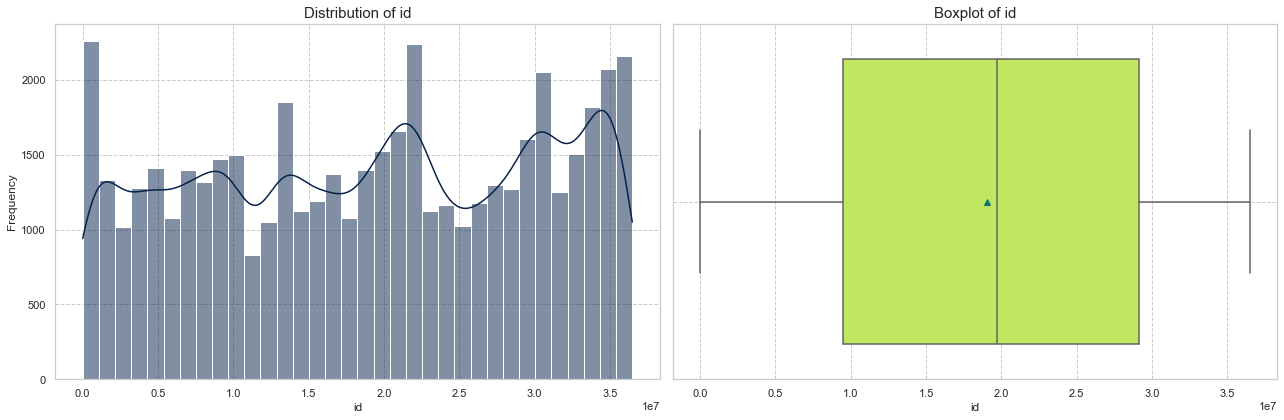

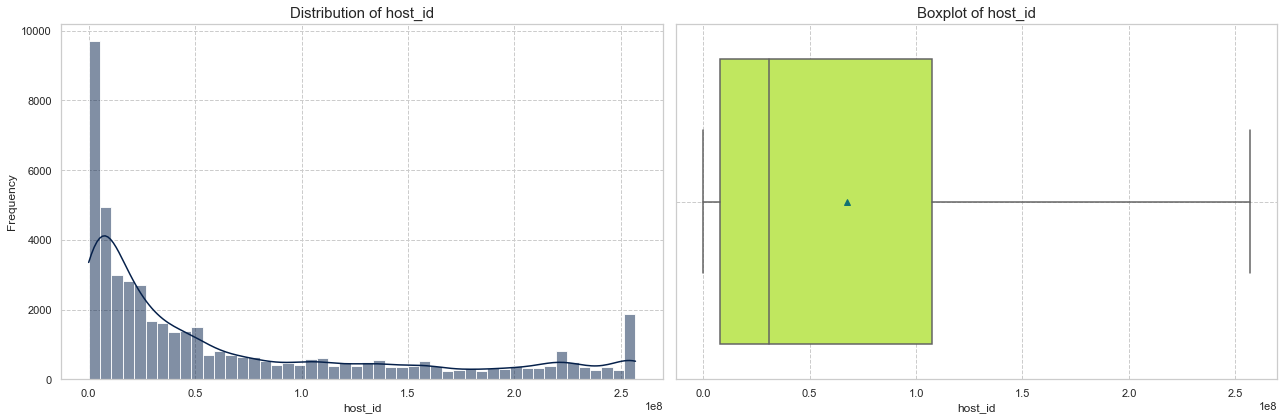

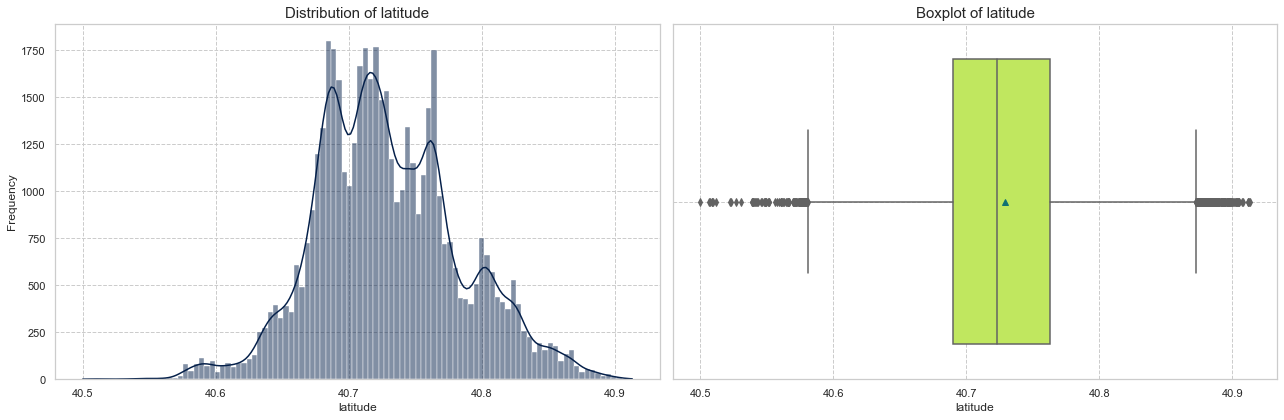

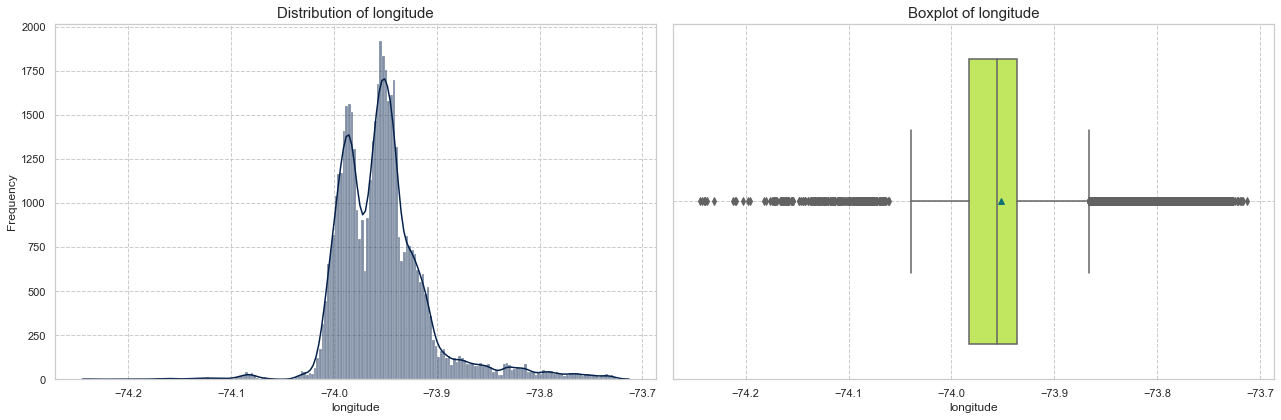

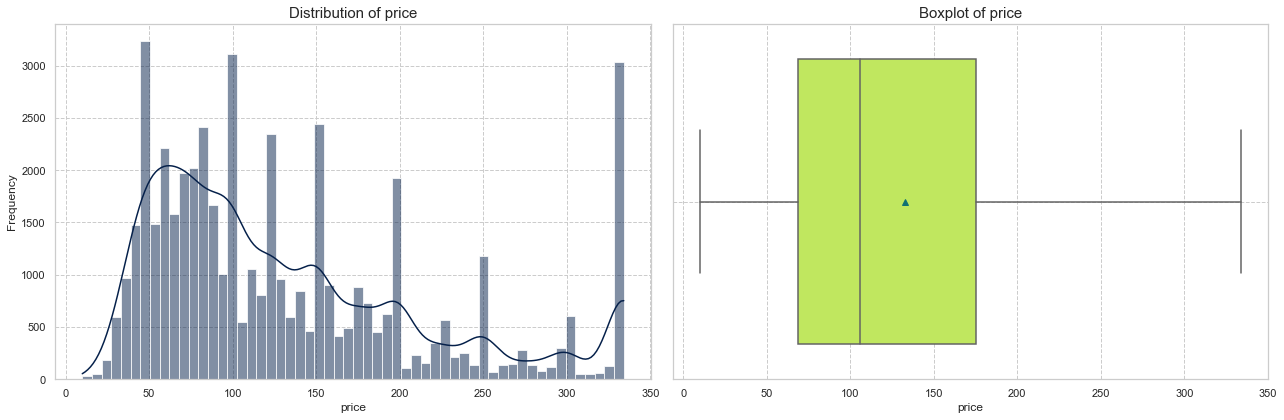

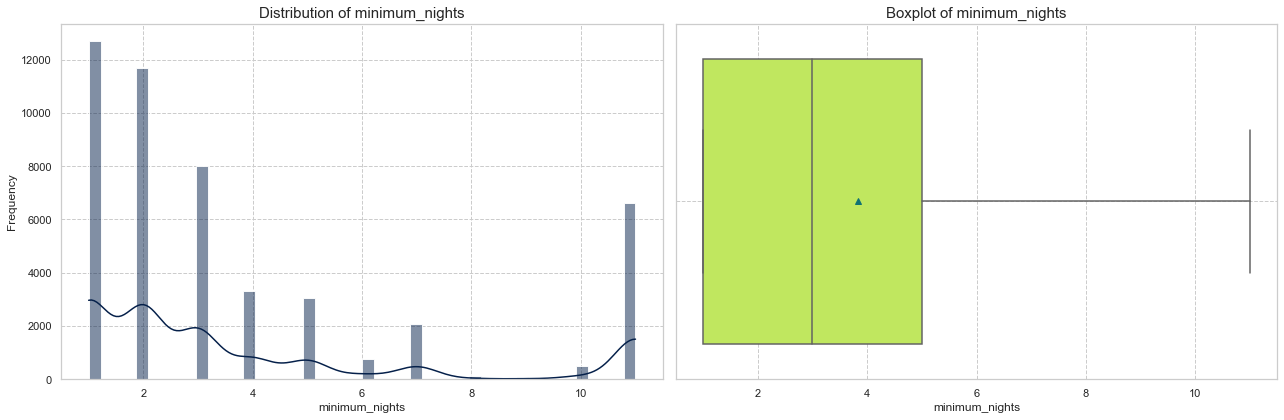

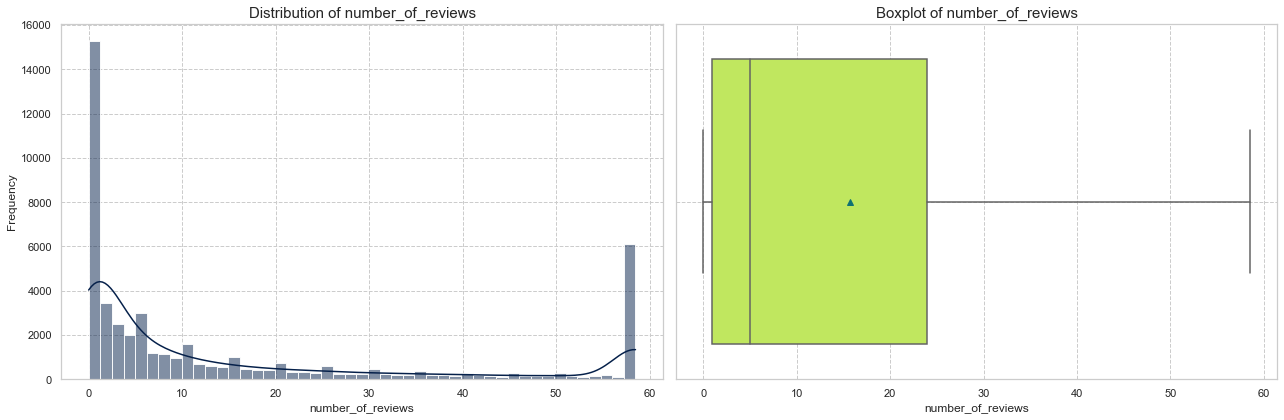

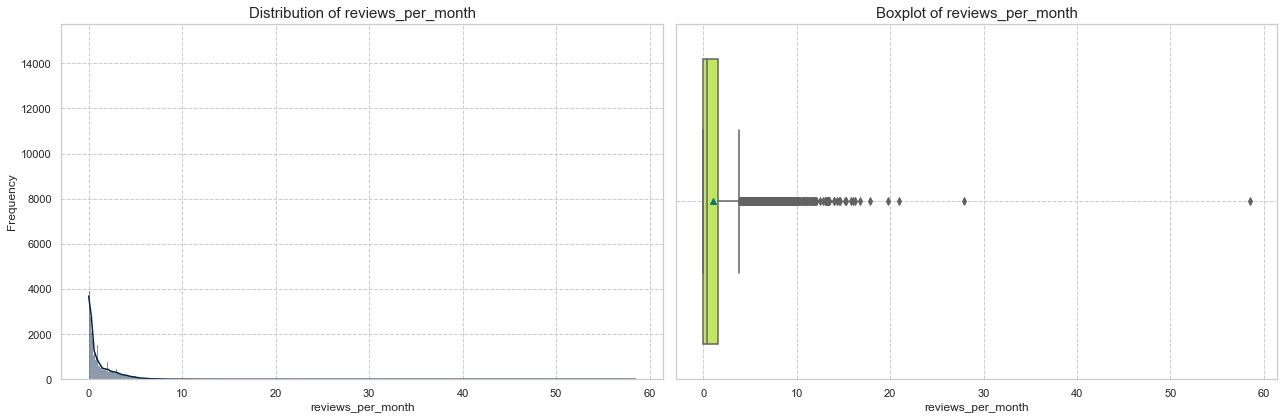

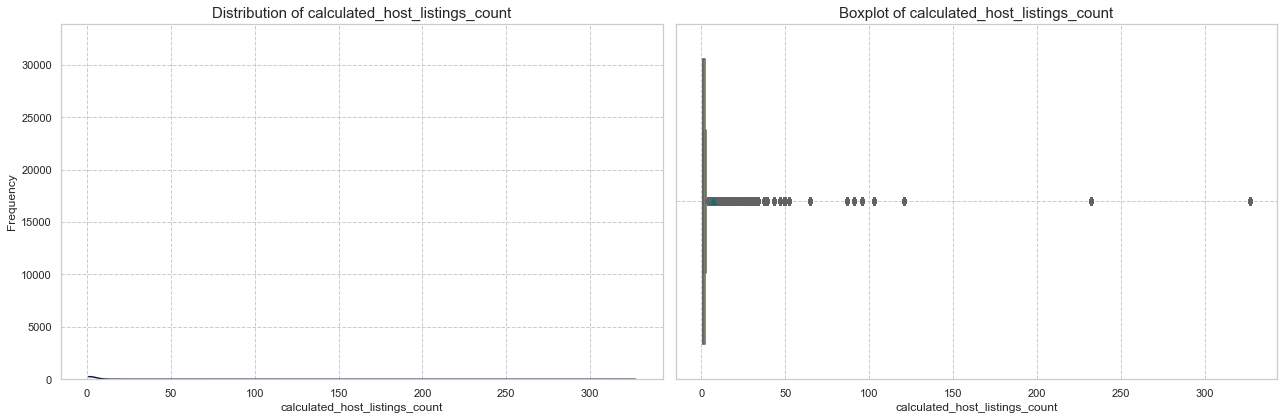

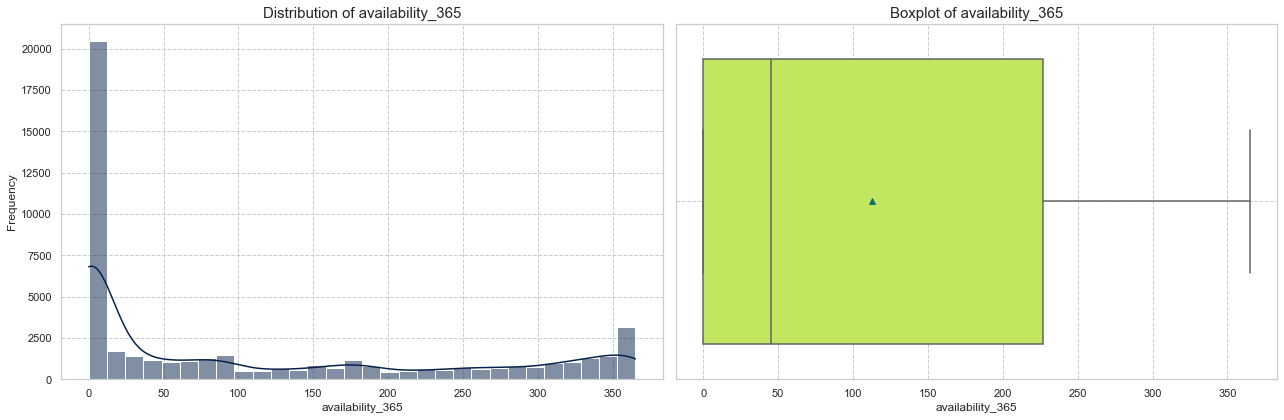

In [146]:
# Chart 1 visualization code

for col in df2_cleaned.describe().columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

    # Histogram plot
    sns.histplot(df2_cleaned[col], ax=axes[0], kde=True, color='#05204a', edgecolor='white')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')
    axes[0].set_title("Distribution of " + col, fontsize=15)
    axes[0].grid(True, linestyle='--')

    # Boxplot
    sns.boxplot(df2_cleaned[col], ax=axes[1], orient='h', showmeans=True, color='#cafe48')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('')
    axes[1].set_title("Boxplot of " + col, fontsize=15)
    axes[1].grid(True, linestyle='--')

    # Adjust spacing between subplots
    plt.tight_layout()
    # Show the plots
    plt.show()


1.Why did you pick the specific chart?<br>
• A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.<br>
• Thus, we used the histogram plot to analyse the variable distributions over the whole dataset whether it's symmetric or not.<br>
• A boxplot is used to summarize the key statistical characteristics of a dataset, including the median, quartiles, and range, in a single plot. Boxplots are useful for identifying the presence of outliers in a dataset, comparing the distribution of multiple datasets, and understanding the dispersion of the data. They are often used in statistical analysis and data visualization.<br>
• Thus, for each numerical varibale in the given dataset, I used box plot to analyse the outliers and interquartile range including median, maximum and minimum value.<br>

2. What is/are the insight(s) found from the chart?<br>
From above distribution charts we can see that, not all columns are symmetrically distributed and the mean and median are ranging the same is for numerical columns.<br>
3. Will the gained insights help creating a positive business impact?<br>
Are there any insights that lead to negative growth? Justify with specific reason.
Histogram and Box plot cannot give us whole information regarding data. It's done just to see the distribution of the column data over the dataset.<br>
**What is the average price for each neighbourhood group?**

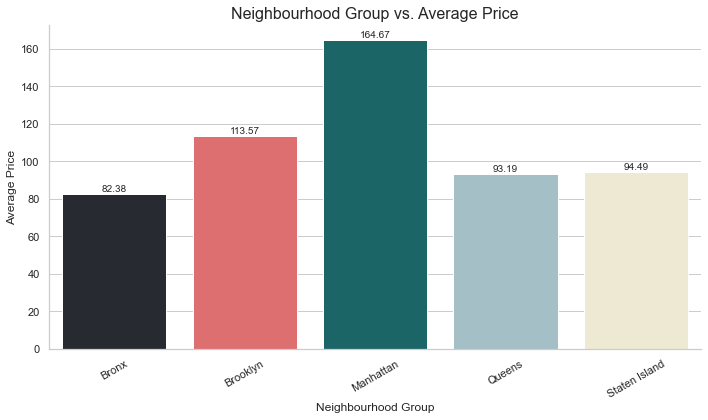

In [128]:
# Group the dataset by "Neighbourhood group" and calculate the average price
neighborhood_avg_price = df2_cleaned.groupby('neighbourhood_group')['price'].mean()

# Set the style of the plot
sns.set(style="whitegrid")

# Create a bar plot with a custom color palette
plt.figure(figsize=(10, 6))
colors = ['#272932', '#f05d5e', '#0f7173', '#9fc2cc', '#f1ecce']
ax = sns.barplot(x=neighborhood_avg_price.index, y=neighborhood_avg_price, palette=colors)

# Set the title and axis labels
plt.title('Neighbourhood Group vs. Average Price', fontsize=16)
plt.xlabel('Neighbourhood Group', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=30)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

# Remove the top and right spines
sns.despine()

# Display the plot
plt.tight_layout()
plt.show()


1.What is the puropose of barchart?<br>
A bar plot is an effective visualization technique for comparing the average prices of different neighborhood groups in the Airbnb 2019 NYC data set. By representing each neighborhood group with a separate bar, the height of each bar corresponds to the average price. This visual representation allows for easy interpretation and identification of trends. Viewers can quickly compare the heights of the bars to determine which neighborhood groups tend to have higher or lower average prices. The clear and intuitive nature of a bar plot makes it a useful tool for understanding and analyzing the average prices across different neighborhood groups in the data set.<br>
2. What is/are the insight(s) found from the chart?<br>
Analyzing the average prices of different neighborhood groups in the Airbnb 2019 NYC data set using a bar plot can provide valuable insights. By visually comparing the heights of the bars, we can identify which neighborhoods have higher or lower average prices. This information can be crucial for both hosts and guests. Hosts can gain insights into which neighborhoods tend to command higher prices and potentially adjust their pricing strategies accordingly. Guests, on the other hand, can use this information to make informed decisions about where to book accommodations based on their budget and preferences. Additionally, the ordered arrangement of the bars can reveal trends, highlighting which neighborhood groups consistently have higher or lower average prices. Overall, this analysis can help stakeholders in the Airbnb market understand the variations in prices across different neighborhood groups, enabling them to make data-driven decisions and optimize their experiences in the NYC market.<br>
3. Will the gained insights help creating a positive business impact?<br>
Are there any insights that lead to negative growth? Justify with specific reason.

In [148]:
#Chart 3 visualization code
#using a pivot plot
df2_cleaned_pivot = pd.pivot_table(df2_cleaned, index=['neighbourhood_group'], values='id', aggfunc=['count'], margins=True, margins_name='Total Count')
df2_cleaned_pivot

count
                        id
neighbourhood_group       
Bronx                 1090
Brooklyn             20095
Manhattan            21660
Queens                5666
Staten Island          373
Total Count          48884

By creating a pivot table of the total number of listings grouped by the different boroughs, we learn that out of the 49,884 listings being analyzed, 21,660 of them are located in Manhattan and 20,095 in Brooklyn. Staten Island shows up last with only 278 listings.


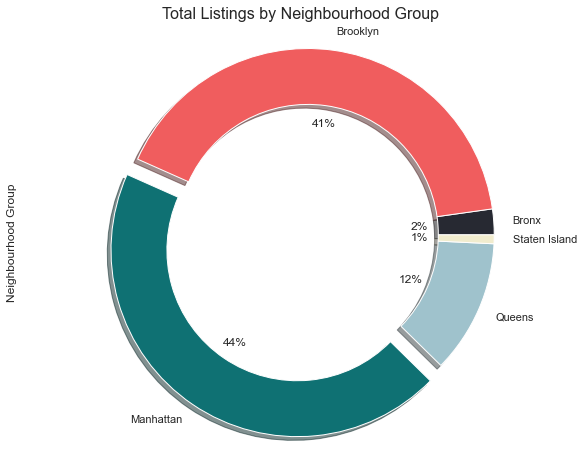

In [140]:
df3 = df2_cleaned.groupby('neighbourhood_group')['id'].count()
plt.figure(figsize=(10, 8))

colors = ['#272932', '#f05d5e', '#0f7173', '#9fc2cc', '#f1ecce']
explode = (0, 0, 0.1, 0, 0)  # Explode the first slice for emphasis

sns.set(style='whitegrid')
sns.set_palette(sns.color_palette(colors))
df3.plot.pie(labels=df3.index, autopct='%1.0f%%', startangle=0, explode=explode, wedgeprops=dict(width=0.3), shadow=True)

plt.ylabel('Neighbourhood Group', fontsize=12)
plt.title('Total Listings by Neighbourhood Group', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures a circular pie
plt.show()


1. Why did you pick the specific chart?<br>
A pie plot is a suitable visualization for determining the neighborhood group with the highest number of listings in the Airbnb 2019 NYC dataset. It represents the distribution of listings through proportional slices, where each slice corresponds to a neighborhood group and its size reflects the relative number of listings. By comparing the sizes of the slices, it becomes evident which neighborhood group has the largest slice and thus the highest number of listings. The clear and intuitive nature of the pie plot allows viewers to easily grasp the distribution and identify the most popular neighborhood group for accommodations in NYC.<br>

2. What is/are the insight(s) found from the chart?<br>
Analyzing the distribution of listings across neighborhood groups in the Airbnb 2019 NYC dataset using a pie plot can provide valuable insights. By visualizing the proportional representation of each neighborhood group, we can identify the group with the highest number of listings, offering valuable information about the popularity and demand for accommodations in different areas of the city. This insight can be advantageous for hosts looking to optimize their listings by focusing on the most popular neighborhood group. Additionally, guests can benefit from this information by knowing which neighborhood group offers a wider range of choices and potentially better availability. It also allows
stakeholders amies of the NYC Airbnb market.<br>

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific Teason.<br>
The insights gained from analyzing the distribution of listings across neighborhood groups in the Airbnb 2019 NYC dataset using a pie plot can have a positive business impact by allowing hosts to focus on the most popular neighborhood group and optimize their marketing efforts. Concentrating resources in the group with the highest number of listings can increase bookings and profitability. However, there is a potential for negative growth if one neighborhood group dominates, leading to oversupply, intense competition, and potential decreases in prices and profitability. It may also limit diversity and opportunities for hosts in other neighborhood groups. To mitigate these risks, hosts should consider festere beyond just to eneure sustainable growth.

How does average availability vary with price



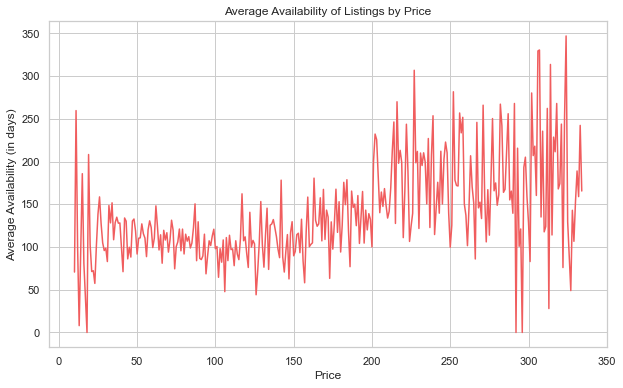

In [133]:
# Group the data by neighbourhood_group' and calculate the average availability 
availability_by_group= df2_cleaned.groupby('price')['availability_365'].mean()
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=availability_by_group.index, y=availability_by_group.values, color='#f05d5e')
# Set the title and axis labels
plt.title('Average Availability of Listings by Price')
plt.xlabel('Price')
plt.ylabel('Average Availability (in days)')
# Display the plot
plt.show()

1. Why did you pick the specific chart?<br>
By utilizing a line plot, analysts can gain insights into how the average availability of accommodations in different neighborhood groups is influenced by their respective price ranges. This information can assist hosts and guests in making informed decisions based on the relationship between price and availability in the Airbnb 2019 NYC dataset<br>
2. What is/are the insight(s) found from the chart?<br>
The line plot shows how availability changes with price for different neighborhood groups in the Airbnb 2019 NYC dataset. It reveals whether higher prices are associated with higher or lower availability and identifies neighborhood groups with consistently high availability. The plot also highlights optimal price ranges for maximizing availability within each group. Comparing patterns across neighborhood groups helps understand variations in the availability-price relationship, aiding decision-making for hosts and guests.<br>
3. Will the gained insights help creating a positive business impact?<br>
Are there any insights that lead to negative growth? Justify with specific reason.<br>
The insights gained from the line plot can have a positive business impact by optimizing pricing strategies and helping guests make informed choices. However, there is a potential for negative growth if higher prices lead to significantly lower availability or if the optimal price range falls outside the desired range for guests. Competition among hosts may also drive down prices. Balancing pricing strategies, considering unique features, and diversifying offerings can mitigate risks and promote positive growth.

**5.Bivariate Analysis:**

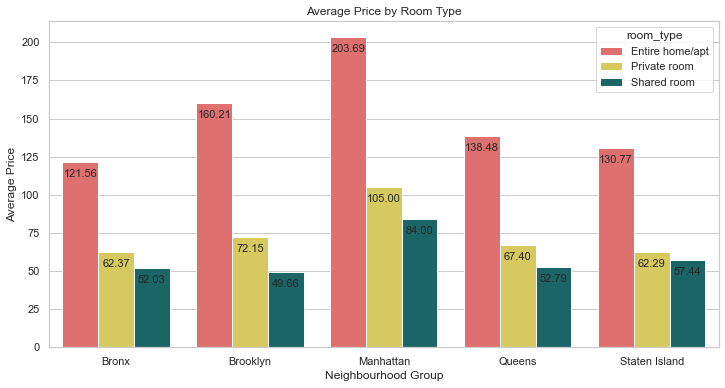

In [139]:
# Select the relevant columns
df3 = df2_cleaned[['neighbourhood_group', 'room_type', 'price']]

# Group the data by neighbourhood group and room type, and calculate the mean price
df3= df3.groupby(['neighbourhood_group', 'room_type'], as_index=False)[['price']].mean()

# Create a figure and set the theme to white
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# Creating a custom color palette
my_pal = {'Entire home/apt': '#f05f5e', "Private room": "#ead94c", "Shared room": '#0f7173'}

# Create a bar plot with x as neighbourhood_group, y as price, hue as room type, and using the custom color palette
ax = sns.barplot(x="neighbourhood_group", y="price", data=df3, hue='room_type', palette=my_pal)

# Add annotations to the bars with the formatted average price values
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', size=11, xytext=(0, -12), textcoords='offset points')

# Set the x and y labels, and the title of the plot
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type')

# Show the plot
plt.show()


1. Why did you pick the specific chart?<br>
A bar plot is used in the Airbnb 2019 NYC dataset to visualize the distribution of listing prices across different room types. This plot allows for a clear comparison of prices among the categories, with each room type represented by a separate bar. The height of each bar indicates the range or average price for that room type, enabling viewers to identify variations in pricing across different types of accommodations. The bar plot provides valuable insights into the price dynamics and trends associated with each room type, assisting hosts and guests in making informed decisions based on their budget and preferences.<br><br>
2. What is/are the insight(s) found from the chart?<br>
The insights gained from the bar plot depicting the distribution of listing prices across different room types in the Airbnb 2019 NYC dataset can provide valuable information. The plot reveals the price ranges and differences between room types, allowing guests to identify accommodations that align with their budget. It also highlights popular room types and potential outliers, providing an understanding of market preferences and unique pricing patterns. This information assists both hosts and guests in making informed decisions regarding pricing strategies and accommodation choices, ultimately enhancing the overall Airbnb experience in NYC.<br><br>
3. Will the gained insights help creating a positive business impact?<br>
Are there any insights that lead to negative growth? Justify with specific reason.
The insights gained from analyzing the distribution of listing prices across different room types using a bar plot in the Airbnb 2019 NYC datasetcan have a positive business impact by optimizing pricing strategies and meeting guest preferences. However, there is a potential for negative growth if certain room types are consistently overpriced or if intense price competition arises. Striking a balance between competitiveness and profitability is crucial for hosts to mitigate these risks and maintain positive business growth.<br><br>
**What are the most frequently revived room types in each neighborhood on a monthly basis?**<br>

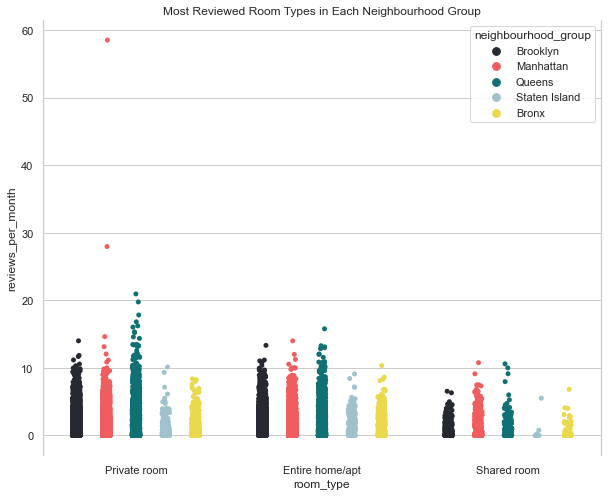

In [151]:
# Chart 6 visualization code

#Create a figure and axis object
f, ax = plt.subplots (figsize=(10, 8))

# Create a strip plot with room type on x-axis, reviews_per_month on y-axis, and hue as neighbourhood_group
ax=sns.stripplot(x='room_type', y='reviews_per_month', hue='neighbourhood_group', dodge=True, data=df2_cleaned, palette=['#272932', '#f05d5e', '#0f7173', '#9fc2cc', '#ead94c'])

# Set the title of the plot
ax.set_title('Most Reviewed Room Types in Each Neighbourhood Group')
# Remove the spines on the right and bottom sides of the plot for cleaner appearance
sns.despine(right=False, bottom=True)
# Show the plot
plt.show()

1. Why did you pick the specific chart?<br>
By utilizing a strip plot, analysts can gain insights into the most reviewed room types in each neighborhood per month in the Airbnb 2019 NYC dataset. This visualization helps hosts understand which room types are in high demand and can guide their marketing and investment decisions. It also provides valuable information for guests seeking popular accommodations in specific neighborhoods and time periods.<br><br>
2. What is/are the insight(s) found from the chart?<br>
The insights gained from the strip plot showcasing the most reviewed room types in each neighborhood per month in the Airbnb 2019 NYC dataset provide valuable information. The plot reveals popular room types, seasonal trends, neighborhood preferences, and potential outliers. This knowledge helps hosts and guests understand demand patterns, make informed decisions, and tailor their offerings or choices accordingly. The insights from the chart can guide marketing strategies and enhance guest satisfaction in the NYC Airbnb market.<br><br>
3. Will the gained insights help creating a positive business impact?<br>
Are there any insights that lead to negative growth? Justify with specific reason.
The insights gained from analyzing the most reviewed room types in each neighborhood per month using a strip plot in the Airbnb 2019 NYC dataset can help create a positive business impact By understanding popular room types and tailoring marketing efforts accordingly hosts can attract more guests and increase bookings, leading to business growth. However, there is a potential for negative growth if limited availability of the most reviewed room types or overlooking other room types occurs. To mitigate these risks, hosts should maintain a diverse range of offerings and adapt to market demands to ensure continued positive business growth.

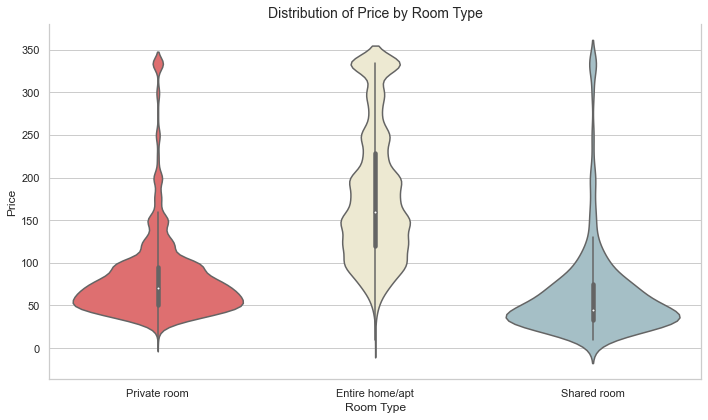

In [153]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Customize color palette
colors = ['#f05d5e', '#f1ecce', '#9fc2cc']
sns.violinplot(x="room_type", y="price", data=df2_cleaned, palette=colors)

# Set axis labels and title
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Distribution of Price by Room Type', fontsize=14)

# Adjust tick label font size
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Remove top spine
sns.despine(right=False)

# Display the plot
plt.tight_layout()
plt.show()


1. Why did you pick the specific chart?<br>
By utilizing a violin plot, analysts can gain insights into how the listing prices vary across different room types in the Airbnb 2019 NYC dataset. It helps in understanding the range, shape, and skewness of the price distributions for each room type, enabling hosts and guests to make informed decisions based on their pricing preferences and expectations.<br><br>
2. What is/are the insight(s) found from the chart?<br>
The violin plot depicting the distribution of listing prices across different room types in the Airbnb 2019 NYC dataset provides valuable insights. It reveals the variation in price ranges, central tendency, skewness, and potential outliers for each room type. This information helps hosts and guests understand the pricing landscape, make informed decisions based on their budget and preferences, and identify unique or exceptional accommodations. Overall, the violin plot enhances the understanding of listing prices across room types, contributing to an improved Airbnb experience in NYC.<br><br>
3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.<br>
The insights gained from analyzing the distribution of listing prices across different room types using a violin plot in the Airbnb 2019 NYC dataset have the potential to create a positive business impact. By optimizing pricing strategies based on the observed price ranges and distributions, hosts can attract more bookings and increase revenue. However, there is a risk of negative growth if certain room types are consistently overpriced, leading to decreased demand, or if intense price competition arises. Hosts should strike a balance between competitiveness and profitability, considering market dynamics and guest preferences to ensure sustainable business growth.

**6. Multivariate Analysis:**

How does the price of the properties vary based on location in NYC?

In [154]:
#Chart 11 visualization code
#saved the original map image on my github repository and read the image using imread function
from skimage.io import imread
from matplotlib.colors import ListedColorтар

plt.figure(figsize=(10,7))

# Load the map image using the imread function
img=imread('New_York_City_.png')
custom_colors = ['#272932', '#f05d5e','#0f7173','#9fc2cc','#flecce',]


# Create a custom colormap
custom_cmap = ListedColormap(custom_colors)

# Display the map image
plt.imshow(img, zorder=0, extent=[df2_cleaned['longitude'].min(),df2_cleaned['longitude'].max(),df2_cleaned['latitude'].min(),df2_cleaned['latitude'].max()]) ax = plt.gca()

# Create a scatter plot of latitude and longitude with price as the color
df2_cleaned.plot(legend=False, kind='scatter', x='longitude', y='latitude', label='price_trends', c='price', ax=ax, cmap=custom_cmap, colorbar=True, alpha=0.7, figsize=(10,8)) plt.title('Price Variation using Spatial data')
plt.legend()
# Show the plot
plt.show()
I

SyntaxError: invalid syntax (Temp/ipykernel_15824/1462396919.py, line 17)

No handles with labels found to put in legend.


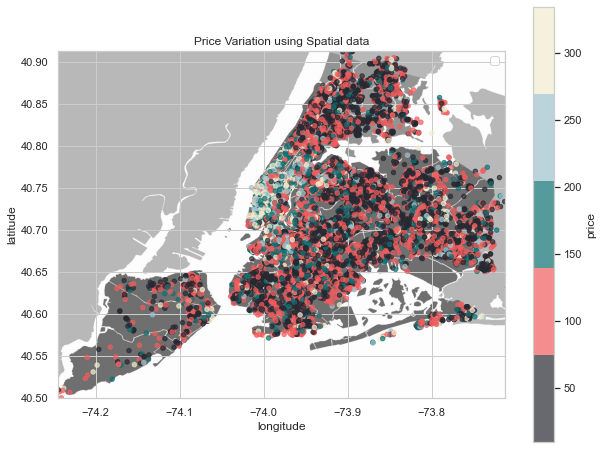

In [156]:
from skimage.io import imread
from matplotlib.colors import ListedColormap

plt.figure(figsize=(10, 7))

# Load the map image using the imread function
img = imread('New_York_City_.png')
custom_colors = ['#272932', '#f05d5e', '#0f7173', '#9fc2cc', '#f1ecce']

# Create a custom colormap
custom_cmap = ListedColormap(custom_colors)

# Display the map image
plt.imshow(img, zorder=0, extent=[df2_cleaned['longitude'].min(), df2_cleaned['longitude'].max(),
                                  df2_cleaned['latitude'].min(), df2_cleaned['latitude'].max()])
ax = plt.gca()

# Create a scatter plot of latitude and longitude with price as the color
scatter = df2_cleaned.plot(legend=False, kind='scatter', x='longitude', y='latitude', label='price_trends',
                           c='price', ax=ax, cmap=custom_cmap, colorbar=True, alpha=0.7, figsize=(10, 8))
plt.title('Price Variation using Spatial data')
plt.legend()

# Show the plot
plt.show()


1. Why did you pick the specific chart?<br>
The specific chart chosen is a scatter plot overlaid on a map image of New York City. This chart was selected to visualize the geographical distribution of Airbnb rental prices across different neighborhoods. It combines location information (latitude and longitude) with the price variable, providing a spatial understanding of price trends.<br><br>
2. What is/are the insight(s) found from the chart?<br>
Geographical price distribution: The chart shows the variation in rental prices across different neighborhoods in New York City.
Spatial patterns: It helps identify clusters of high or low-priced rentals in specific areas of the city.<br><br>
3. Will the gained insights help creating a positive business impact?<br>
Are there any insights that lead to negative growth? Justify with specific reason.
The insights gained from the chart can have a positive business impact by guiding pricing strategies, targeting specific markets, and identifying investment opportunities. However, it's crucial to consider areas with consistently low prices or oversaturation of listings to avoid negative growth prospects.<br><br>

Identifying the top 30 busiest Airbnb hosts based on average review rates and exploring the distribution of review rates across
different room types for these hosts.

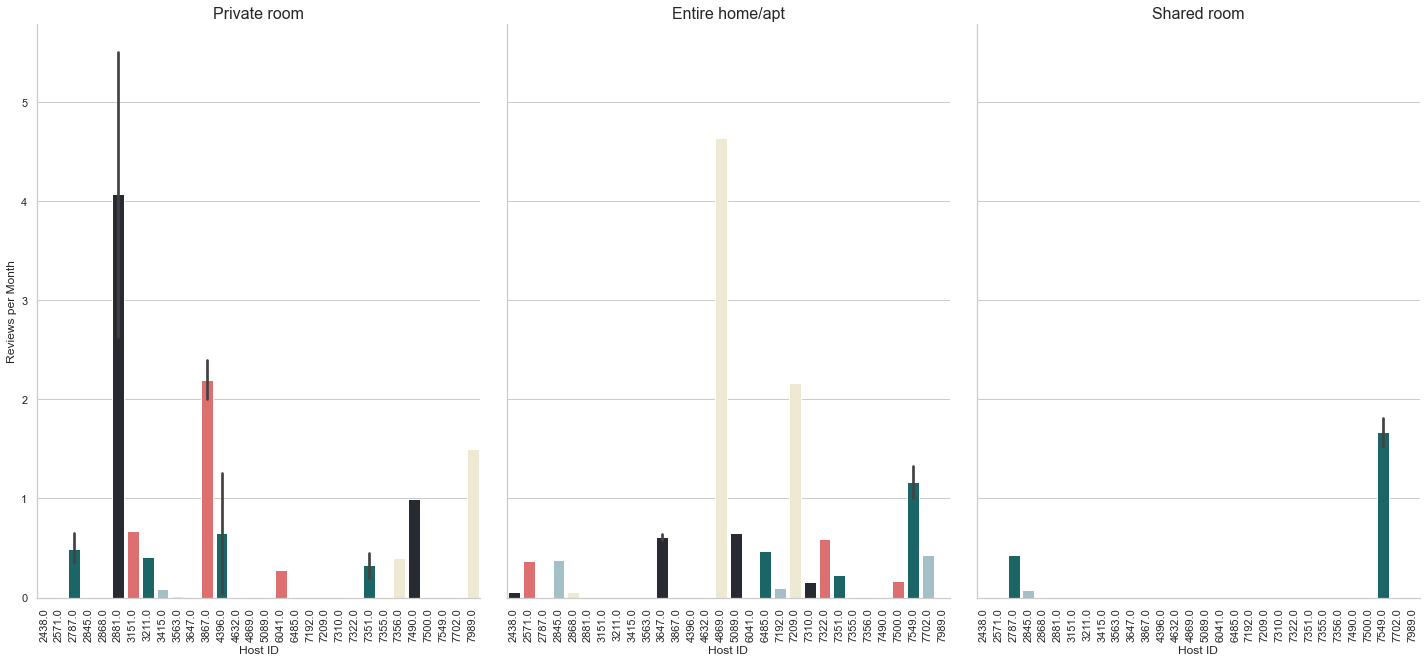

In [158]:
# Chart 12 visualization code
# Create a series of top 30 hosts by review rate
review_rate = df2_cleaned.groupby('host_id')['reviews_per_month'].mean().head(30).reset_index()
review_rate.sort_values('reviews_per_month', ascending=False, inplace=True)
review_rate = review_rate['host_id']

# Create a new dataframe containing information of only these top 30 hosts
Top_host_by_review_rate = df2_cleaned[df2_cleaned['host_id'].isin(review_rate)]
Top_host_by_review_rate = Top_host_by_review_rate.sort_values('reviews_per_month')

# Define a custom palette
custom_colors = ['#272932', '#f05d5e', '#0f7173', '#9fc2cc', '#f1ecce']

# Create a catplot to visualize the review rates of these top 30 hosts by room type
fig = sns.catplot(data=Top_host_by_review_rate, x='host_id', y='reviews_per_month', col='room_type', kind='bar',
                  height=5, aspect=1.5, palette=custom_colors)
fig.set_xticklabels(rotation=90)
fig.fig.set_size_inches(20, 10)

# Set titles and labels
fig.set_titles(col_template="{col_name}", size=16)
fig.set_axis_labels("Host ID", "Reviews per Month")

# Show the plot
plt.show()


1. Why did you pick the specific chart?<br>
The specific chart chosen is a catplot bar chart that visualizes the review rates of the top 30 hosts by room type. This chart was selected to compare the review rates of these hosts across different room types and identify any variations or patterns.<br><br>
2. What is/are the insight(s) found from the chart?<br>
Comparison by room type: The chart allows for a comparison of review rates among the top hosts across different room types, such as entire homes/apartments, private rooms, and shared rooms.
Variations in review rates: The chart reveals any discrepancies in review rates among the top hosts, highlighting differences in performance across room types.<br><br>
3. Will the gained insights help creating a positive business impact?<br>
Are there any insights that lead to negative growth? Justify with specific reason<br>
• Quality improvement: Hosts can identify areas for improvement based on review rates and focus on enhancing the guest experience in specific room types with lower rates.<br>
• Competitive advantage: Higher review rates can be leveraged as a competitive advantage in marketing efforts to attract more guests and build a strong reputation.<br><br>
How does the price vary w.r.t minimum nights, number of reviews and availabity?
                                                                                   

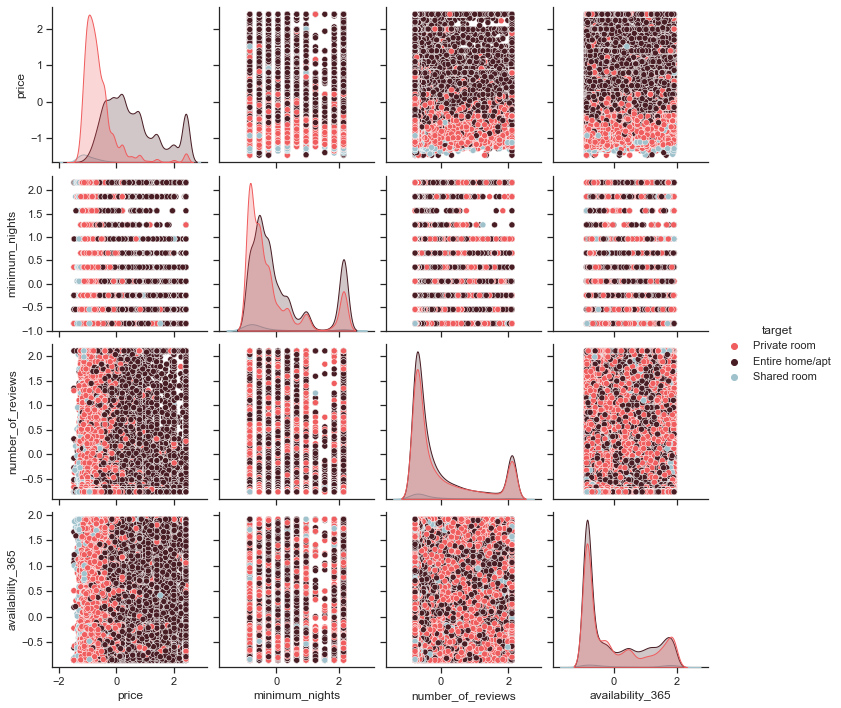

In [163]:
#Chart 13 visualization code
columns = ['price', 'minimum_nights', 'number_of_reviews', 'availability_365'] 
custom_colors = ['#f05d5e', '#481d24', '#9fc2cc']

# Create a dataframe with the selected columns 
data = df2_cleaned[columns]

#Normalize the data for better visualization
data_normalized= (data-data.mean()) / data.std()

# Add a target column for color mapping 
data_normalized['target'] = df2_cleaned['room_type']

# Create a scatter matrix plot 
sns.set_theme(style="ticks") 
sns.pairplot(data_normalized, hue='target', palette=custom_colors)

# Show the plot
plt.show()

1. Why did you pick the specific chart?<br>
The chosen chart is a pairplot that visualizes the relationships between multiple variables (price, minimum nights, number of reviews, and availability) in a scatter matrix. It was selected to explore the correlations and distributions among these variables and observe any patterns or trends.<br><br>
2. What is/are the insight(s) found from the chart?<br>
Variable relationships: The chart allows for the examination of relationships between different variables. For example, it helps identify if there is a correlation between price and availability, or between the number of reviews and minimum nights.<br>
Distributions: The chart provides insights into the distributions of each variable along the diagonal. It helps determine if the variables follow a normal distribution or exhibit skewness.<br><br>
3. Will the gained insights help creating a positive business impact?Are there any insights lead to negative growth? Justify with specific reason<br><br>
Pricing strategy: By analyzing the relationship between price and other variables, businesses can adjust their pricing strategies accordingly. For example, they can determine if higher prices are correlated with longer minimum nights or higher availability.<br>
Operational decisions: Understanding the relationship between minimum nights, availability, and number of reviews can inform operational decisions such as adjusting minimum stay requirements or managing availability to optimize guest satisfaction and maximize bookings.

### Coorleation Heatmap:

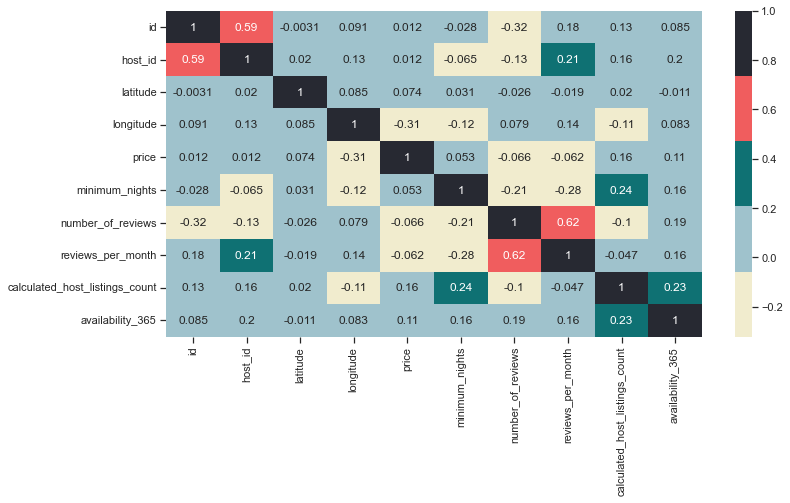

In [165]:
# Define a custom color palette
custom_colors = ['#f1ecce', '#9fc2cc', '#0f7173', '#f05d5e', '#272932']

# Defining the correlation function
plt.figure(figsize=(12, 6))
corr = df2_cleaned.corr()

# Visualize correlations as a heatmap with the custom color palette
sns.heatmap(corr, cmap=custom_colors, annot=True)

# Display the heatmap
plt.show()


1. Why did you pick the specific chart?<br>
The correlation heatmap was chosen because it provides a comprehensive overview of the relationships between variables in the dataset. It allows for easy identification of patterns and associations between different features, helping to uncover potential insights and understand the underlying structure of the data.<br><br>
2. What is/are the insight(s) found from the chart?<br>
The heatmap reveals insights such as positive correlations between variables indicated by lighter colors, negative correlations represented by darker colors, and weak or no correlations in areas without distinct color patterns. These insights help understand the interdependencies between variables and can inform decision-making processes.<br>

#### Pair Plot

In [169]:
import scipy.stats as stats


from scipy.stats import ttest_ind

group1 = df2_cleaned[df2_cleaned['room_type'] == 'Entire home/apt']['price']
group2 = df2_cleaned[df2_cleaned['room_type'] == 'Private room']['price']

t_stat, p_value = ttest_ind(group1, group2)
print(f"T-Test Result: t-statistic = {t_stat}, p-value = {p_value}")

from scipy.stats import f_oneway

group1 = df2_cleaned[df2_cleaned['room_type'] == 'Entire home/apt']['price']
group2 = df2_cleaned[df2_cleaned['room_type'] == 'Private room']['price']
group3 = df2_cleaned[df2_cleaned['room_type'] == 'Shared room']['price']

anova_result = f_oneway(group1, group2, group3)
print(f"ANOVA Result: F-value = {anova_result.statistic}, p-value = {anova_result.pvalue}")


T-Test Result: t-statistic = 156.75416945717996, p-value = 0.0
ANOVA Result: F-value = 12983.333653857644, p-value = 0.0


The results of the t-test and ANOVA indicate significant differences in prices among different groups in the given dataset of Airbnb NYC. Let's interpret each result:

### T-Test Result:
- **T-Statistic:** The t-statistic is 156.75, which is a measure of how many standard deviations the means of the two groups (e.g., 'Entire home/apt' and 'Private room') are apart.
- **P-Value:** The p-value is 0.0, which is below any typical significance level (e.g., 0.05). This suggests strong evidence against the null hypothesis.

**Interpretation:**
The t-test result suggests that there is a significant difference in prices between 'Entire home/apt' and 'Private room' listings in the dataset.

### ANOVA Result:
- **F-Value:** The F-value is 12983.33, which is the ratio of the variance between groups to the variance within groups.
- **P-Value:** The p-value is 0.0, indicating strong evidence against the null hypothesis.

**Interpretation:**
The ANOVA result indicates that there are significant differences in mean prices among at least two of the three room types (e.g., 'Entire home/apt', 'Private room', 'Shared room') in the dataset.

### Overall Inference:
1. **Price Differences Exist:**
   - There are significant differences in prices between 'Entire home/apt' and 'Private room' listings.
   - Additionally, the ANOVA result suggests that these differences are not limited to only these two room types but extend to at least two of the three room types.

2. **Considerations:**
   - The extremely low p-values in both tests indicate a high level of confidence in rejecting the null hypothesis.
   - These results hold strong statistical significance due to the large sample size.

3. **Implications for Airbnb Hosts:**
   - Airbnb hosts should be aware that the choice of room type significantly influences the listing price.
   - Hosts may need to adjust pricing strategies based on the type of accommodation they offer to align with market trends and competition.

4. **Further Analysis:**
   - Post-hoc tests (e.g., Tukey's HSD) can be conducted to identify specific pairs of room types with significant differences in mean prices.
   - The dataset may be further explored to understand factors contributing to these price differences.

These findings can guide hosts, potential guests, and Airbnb stakeholders in making informed decisions based on the observed price variations across different room types in the New York City Airbnb market.

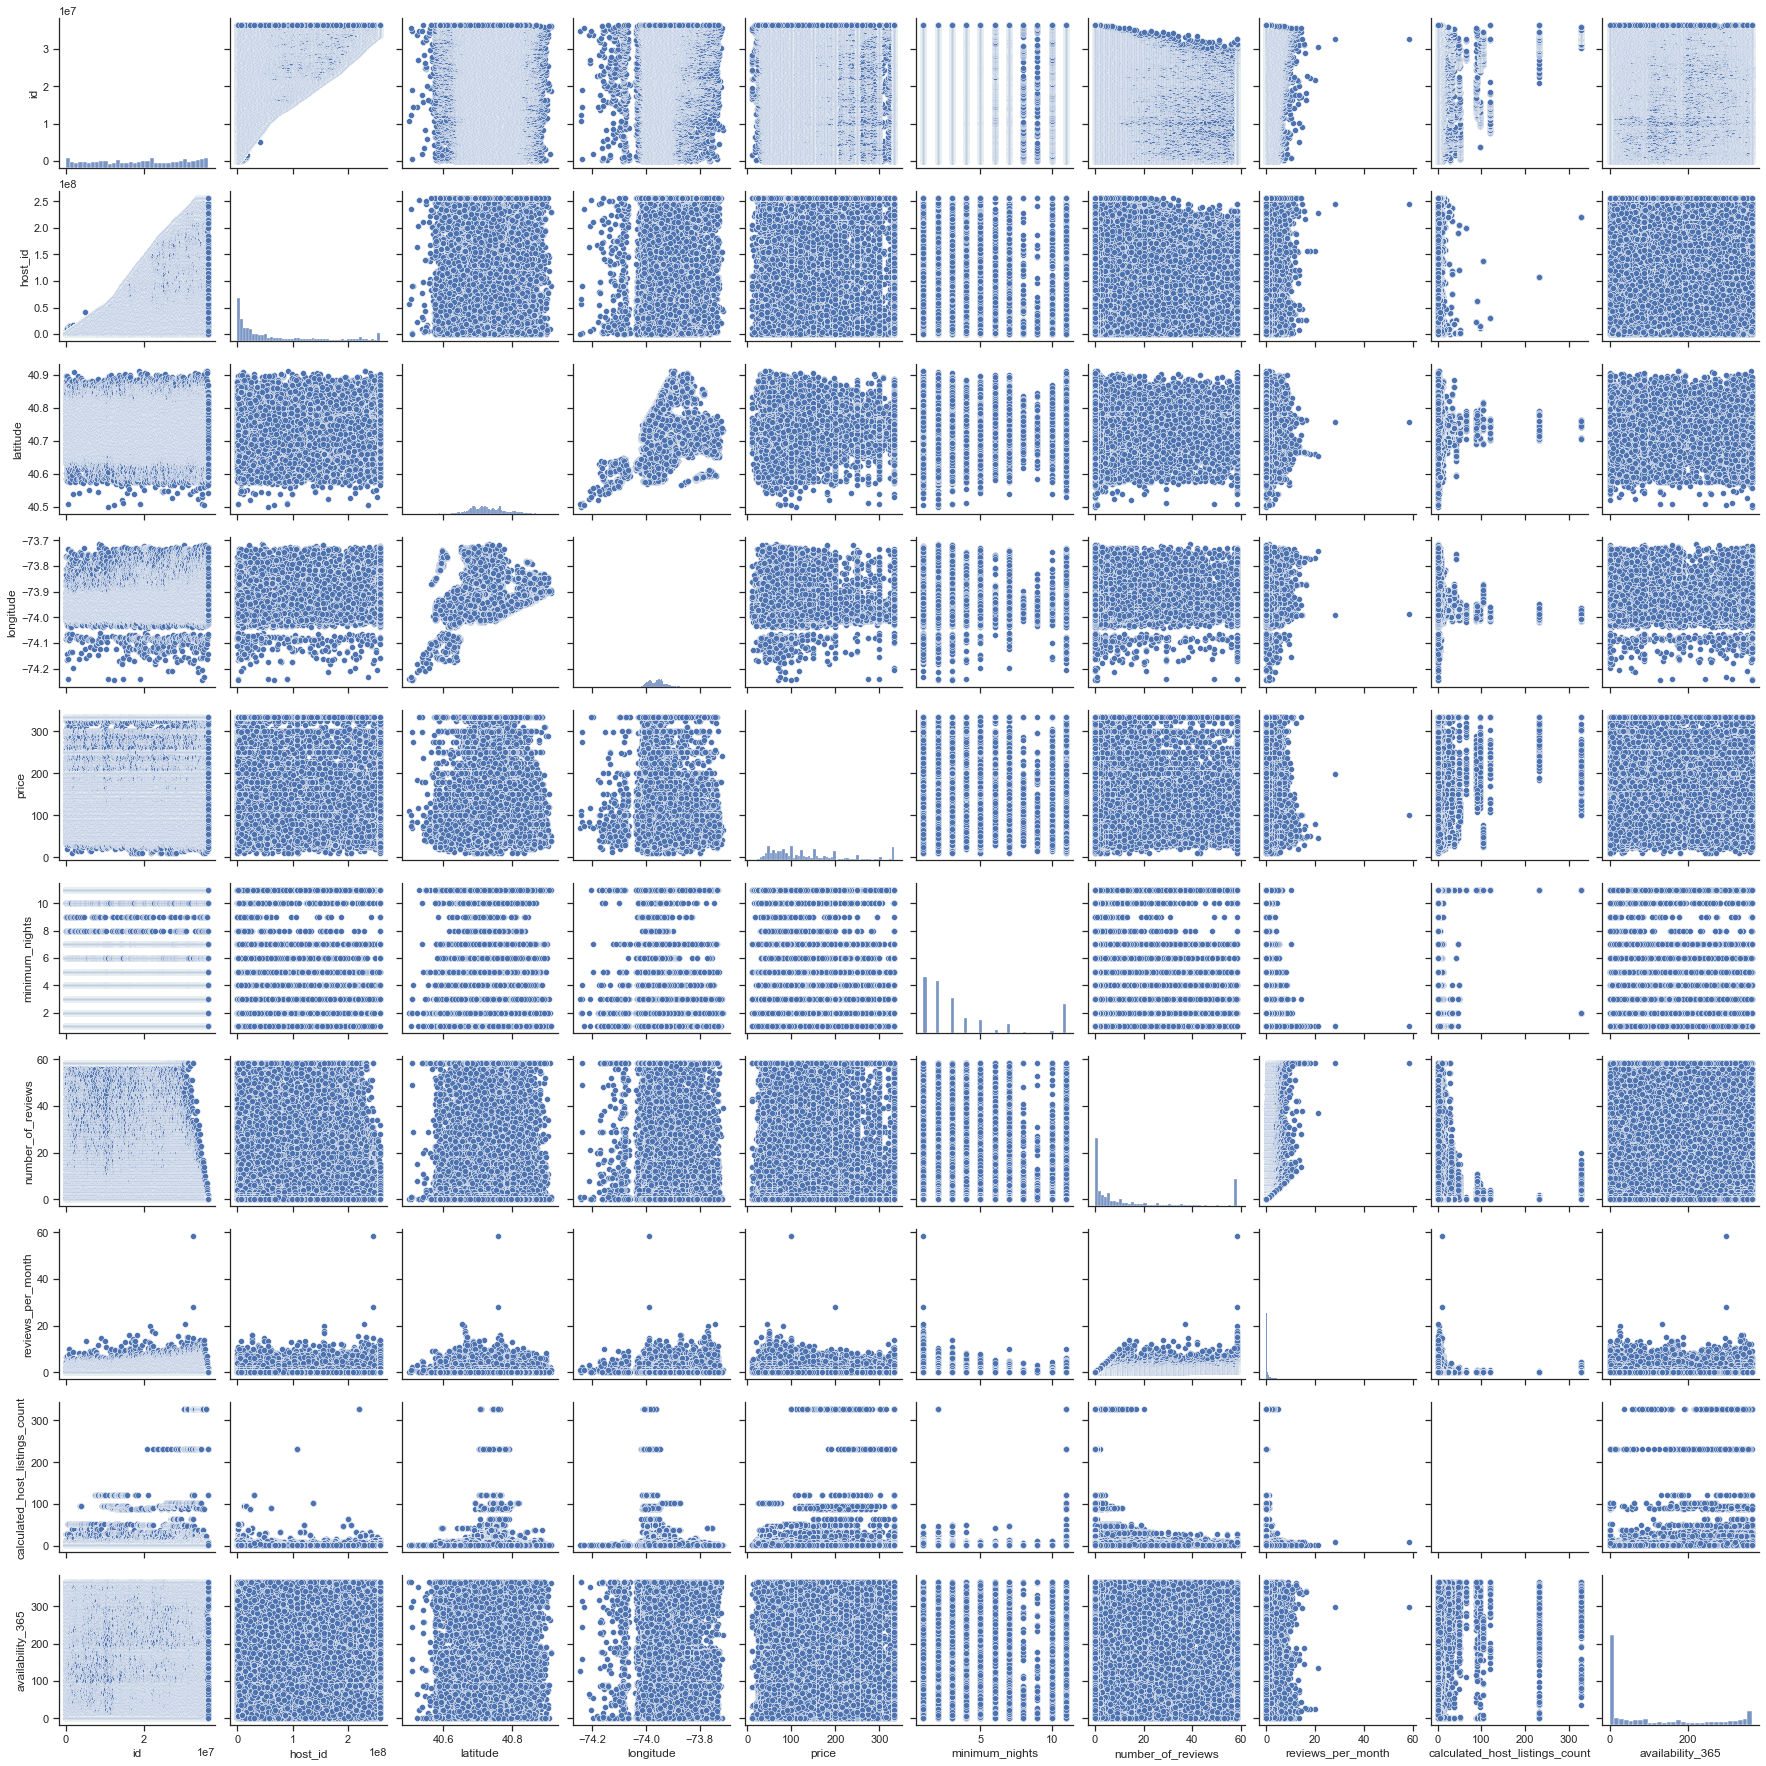

In [166]:
# Pair Plot visualization code
# create a pairplot using the seaborn library to visualize the relationships between different variables in the Airbnb NYC dataset 
sns.pairplot(df2_cleaned)
# show the plot
plt.show()

1. Why did you pick the specific chart?<br>
The pair plot was chosen to visualize the relationships between different variables in the Airbnb NYC dataset in a concise and comprehensive manner.<br><br>
2. What is/are the insight(s) found from the chart?<br>
The pair plot provides insights into the correlations and distributions between variables. It allows us to observe patterns such as linear relationships, clusters, and outliers. These insights can help identify potential associations and dependencies between variables, which can be useful for further analysis and decision-making processes.

**5.Solution to Business Objective**<br>
What do you suggest the client to achieve Business Objective ?<br>
Based on the analysis of the NYC Airbnb dataset, here are some suggestions to help the client achieve their business objectives:<br>
1. Optimize Pricing Strategy: Analyze the relationship between pricing and factors such as location, property type, and amenities. Adjust prices accordingly to maximize occupancy rates and profitability. Consider implementing dynamic pricing strategies based on demand and seasonality.<br>
2. Improve Listing Quality: Enhance the attractiveness and competitiveness of listings by improving the quality of descriptions, photos, and amenities. Highlight unique selling points and ensure accurate and detailed information to attract potential guests.<br>
3. Enhance Customer Experience: Focus on providing excellent customer service and ensuring a positive experience for guests. Promptly address any issues or concerns, and encourage guests to leave reviews to build credibility and attract more bookings.<br>
4. Maintain Property Availability: Ensure a consistent availability of properties throughout the vear especially during peak tourist seasons and events. Plan maintenance and renovation schedules to minimize disruptions and maximize occupancy  rates.<br>
5. Monitor Competitor Activity: Stay updated on the offerings and prices of competitors in the local market. Adjust strategies accordingly to remain competitive and capture potential guests.<br>
6. Consider Special Offers and Discounts: Implement promotional offers, discounts, or loyalty programs to attract guests and encourage repeat bookings Monitor the impact of these offers on occupancy rates and profitability.<br>
7. Stay Compliant with Regulations. Stay informed about local regulations and legal requirements for short-term rentais. Ensure compliance with tax obligations, licensing, and zoning laws to avoid any legal issues.<br>
8. Seek Guest Feedback: Continuously seek feedback from guests to identify areas for improvement and address any recurring issues. Use guest feedback to enhance the overall guest experience and make necessary adjustments to property management.<br>
9. Foster Positive Community Relations: Establish positive relationships with the local community by being respectful, responsible, and considerate. Encourage guests to be mindful of the neighborhood and local regulations to maintain good community relations.<br><br>
By implementing these suggestions, the client can optimize their business operations, attract more guests, and achieve their business objectives of maximizing occupancy rates, profitability, and guest satisfaction.